In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
flat_chess=cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/chess_board.jpeg")
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

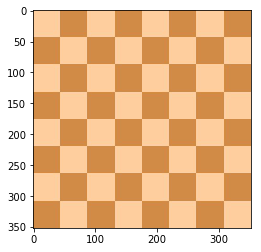

In [4]:
plt.imshow(flat_chess)

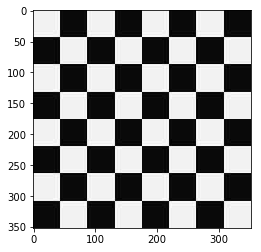

In [5]:
#converting the image into the Gray color
flat_chess_Gray=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(flat_chess_Gray, cmap='gray')

In [6]:
real_chessboard=cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/real_chessboard.jpg")
real_chessboard=cv2.cvtColor(real_chessboard, cv2.COLOR_BGR2RGB)

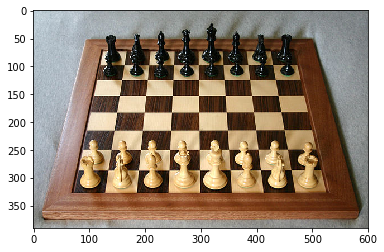

In [7]:
plt.imshow(real_chessboard)

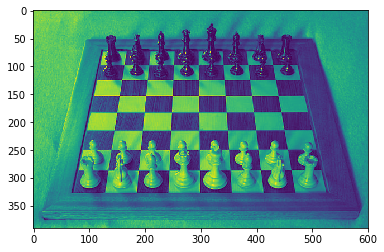

In [8]:
real_chessboard_gray=cv2.cvtColor(real_chessboard, cv2.COLOR_BGR2GRAY)
plt.imshow(real_chessboard_gray)

# cornerHarris Function

src Input single-channel 8-bit or floating-point image.

dst Image to store the Harris detector responses. It has the type CV_32F C1 and the same size as src.

blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs the).

ksize Aperture parameter for the Sobel operator.

k Harris detector free parameter. See the formula in DocString

borderType Pixel extrapolation method. See #BorderTypes.

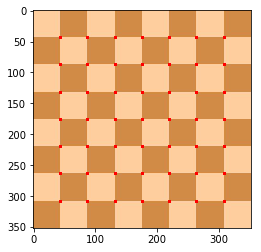

In [15]:
#convert Gray scale Image to folat values
gray=np.float32(flat_chess_Gray)

'''
gray_flat_chess: This is assumed to be the grayscale version of the input Image.
Grayscale images have pixel values ranging from 0 to 255.
np.float32(gray_flat_chess): This converts the grayscale image into a float32 data type.
This is necessary because the Harris Corner Detection algorithm
requires floating-point precision to perform accurate computations.
'''


#corner Harris Detection
dst=cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

'''
cv2.cornerHarris(): 
    This function detects corners in the grayscale image usinÄ¯

src=gray: 
    The source image, which is the grayscale image converted to float values.

blockSize 2: 
    This is the size of the neighborhood considered for corner
    detection. A smaller value focuses on more local features.

ksize=3: 
    The aperture parameter of the Sobel derivative used in the computation.
    It determines the size of the window for the derivative calculation.
k-0.04: 
    Harris detector free parameter,
    used to separate corner-like responses from edge-like responses.
'''

#result is dilated for marking the corners , not important to actual corner dissusion
#this is just  so we can plot out the point on the image shown
dst=cv2.dilate(dst, None)

'''
cv2.dilate(): This function dilates (expands) the areas around detected corners. 
Dilation is not necessary for detecting the corners but is often used to make 
the detected points more visible when plotting.''

'''

#thresholds for an optimal value it may vary depending on the image
flat_chess[dst>0.01*dst.max()]=[255,0,0]


'''
dst > 0.01 dst.max(): 
    This creates a mask where only the points in the Est array with a value greater than 1% 
    of the maximum value are considered as corners.
flat_chess[dst > 0.01 dst.max()] = [255, 0, 0):
    This sets the pixels in the original image (flat_chess), that correspond to worners to
    the color red [255, 0, 0). This highlights the detected corners in red on the image.
'''
plt.imshow(flat_chess)

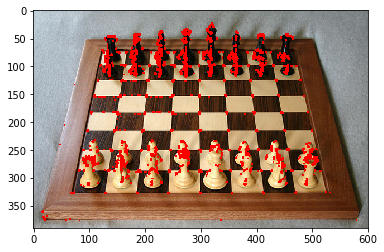

In [20]:
#convert Gray scale Image to folat values
gray=np.float32(real_chessboard_gray)
#corner Harris Detection
dst=cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst=cv2.dilate(dst, None)
real_chessboard[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(real_chessboard)